# Rio Primero Groundwater Model

This is the groundwater model for the IWRM Lecture 07.01.2020!

## First we need all necessary imports

In [1]:
import os
import numpy as np
import flopy.modflow as mf
import shutil

flopy is installed in /Users/ralf/.virtualenvs/flopy/lib/python3.7/site-packages/flopy


* The modflow-files will be stored in './workspace' 
* Each calculation will delete the files

In [2]:
workspace = os.path.join('workspace')

if os.path.exists(workspace):
    shutil.rmtree(workspace)
    
if not os.path.exists(workspace):
    os.makedirs(workspace)


### Setup Model

In [3]:
model = mf.Modflow(modelname='RP1', exe_name='mf2005', model_ws=workspace)

### Setup Discretization and Basic Package

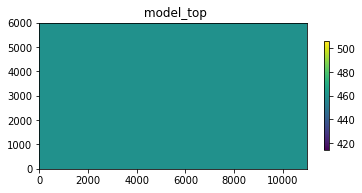

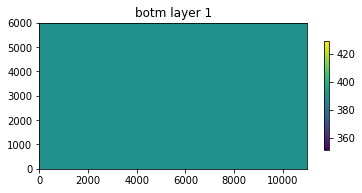

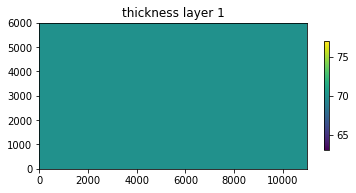

In [4]:
nrow = 6
ncol = 11

delr = 6000/nrow
delc = 11000/ncol

dis = mf.ModflowDis(model, nlay=1, nrow=nrow, ncol=ncol, delr=delr, delc=delc, top=460, botm=390, nper=1, steady=True)
dis.plot()

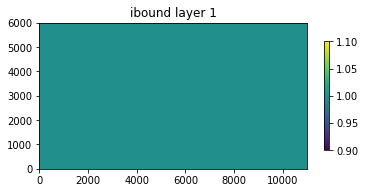

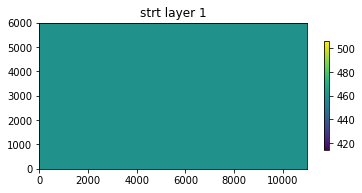

In [5]:
bas = mf.ModflowBas(model, ibound=1, strt=460)
bas.plot()

### Setup Boundary Conditions East/West

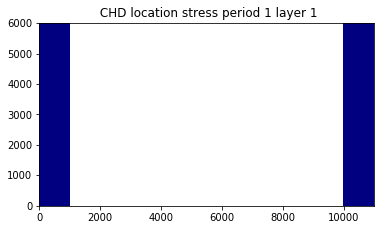

In [6]:
spd = {
    0: [
        [0, 0, 0, 450, 450],
        [0, 1, 0, 450, 450],
        [0, 2, 0, 450, 450],
        [0, 3, 0, 450, 450],
        [0, 4, 0, 450, 450],
        [0, 5, 0, 450, 450],
        [0, 0, 10, 445, 445],
        [0, 1, 10, 445, 445],
        [0, 2, 10, 445, 445],
        [0, 3, 10, 445, 445],
        [0, 4, 10, 445, 445],
        [0, 5, 10, 445, 445],
    ]
}

chd = mf.ModflowChd(model, stress_period_data=spd)
chd.plot()

### Setup Recharge


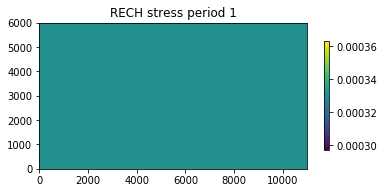

In [7]:
rech = {}
rech[0] = 0.00033
rch = mf.ModflowRch(model, rech=rech)
rch.plot()

### Setup River

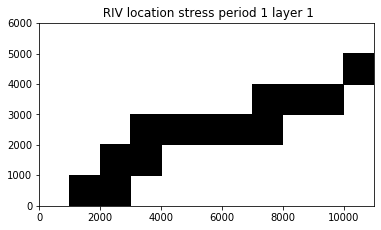

In [8]:
spd = {
    0: [
        [0, 5, 1, 450, 86.4, 448],
        [0, 5, 2, 450, 86.4, 448],
        [0, 4, 2, 450, 86.4, 448],
        [0, 4, 3, 450, 86.4, 448],
        [0, 3, 3, 450, 86.4, 448],
        [0, 3, 4, 450, 86.4, 448],
        [0, 3, 5, 450, 86.4, 448],
        [0, 3, 6, 450, 86.4, 448],
        [0, 3, 7, 450, 86.4, 448],
        [0, 2, 7, 450, 86.4, 448],
        [0, 2, 8, 450, 86.4, 448],
        [0, 2, 9, 450, 86.4, 448],
        [0, 1, 10, 450, 86.4, 448],        
    ]
}
riv = mf.ModflowRiv(model, stress_period_data=spd)
riv.plot()

### Setup Wells

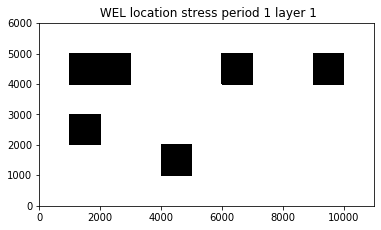

In [9]:
spd = {
    0: [
        [0, 1, 1, -5000],
        [0, 1, 2, -5000],
        [0, 1, 6, -10000],
        [0, 1, 9, -5000],
        [0, 3, 1, -5000],
        [0, 4, 4, -5000],
    ]
}
wel = mf.ModflowWel(model, stress_period_data=spd)
wel.plot()

### Setup Flow-Package (incl. soil parameters)

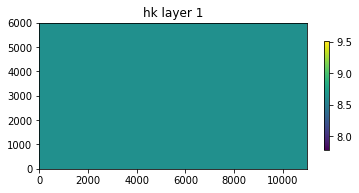

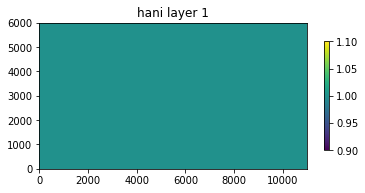

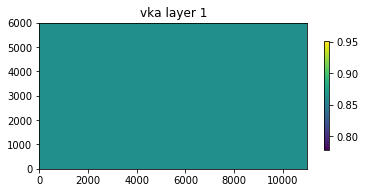

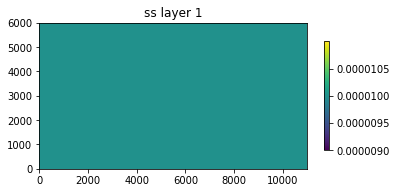

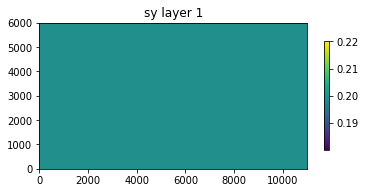

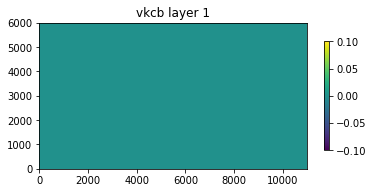

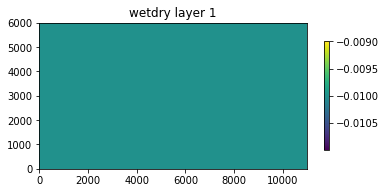

In [10]:
lpf = mf.ModflowLpf(model, hk=8.64, vka=0.864, ss=1e-5, sy=0.2)
lpf.plot()

### The Solver and Output Control

In [11]:
pcg = mf.ModflowPcg(model, rclose=1e-2, hclose=1e-2)
oc = mf.ModflowOc(model)

### Calculate the model

In [12]:
model.write_input()
model.run_model()

FloPy is using the following  executable to run the model: /usr/local/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: RP1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/01/09 13:33:22

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2020/01/09 13:33:22
 Elapsed run time:  0.002 Seconds

  Normal termination of simulation


(True, [])

### Read calculated data

In [13]:
import flopy.utils as fu

hds = fu.HeadFile(os.path.join(workspace, 'RP1.hds'))
h = hds.get_data(kstpkper=(0,0))

### Plot


[]

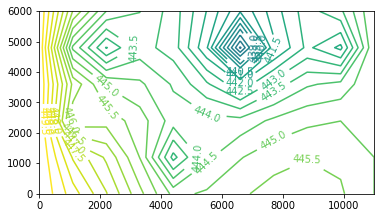

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, delr * ncol, ncol)
y = np.linspace(delc* nrow, 0, nrow)

c = plt.contour(x, y, h[0], np.arange(430, 450, .5))
plt.clabel(c, fmt='%2.1f')
plt.axis('scaled')
plt.plot()